<a href="https://colab.research.google.com/github/RichardKameri/tydata/blob/main/Creditcardspending.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd


In [ ]:
# load the dataset
df = pd.read_csv('/content/Credit card transactions - India - Simple.csv')

In [ ]:
# display the dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26052 entries, 0 to 26051
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   index      26052 non-null  int64 
 1   City       26052 non-null  object
 2   Date       26052 non-null  object
 3   Card Type  26052 non-null  object
 4   Exp Type   26052 non-null  object
 5   Gender     26052 non-null  object
 6   Amount     26052 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 1.4+ MB


In [ ]:
# change the date data type
df['Date'] = pd.to_datetime(df['Date'])

<ipython-input-5-17114d3ec1b5>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26052 entries, 0 to 26051
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   index      26052 non-null  int64         
 1   City       26052 non-null  object        
 2   Date       26052 non-null  datetime64[ns]
 3   Card Type  26052 non-null  object        
 4   Exp Type   26052 non-null  object        
 5   Gender     26052 non-null  object        
 6   Amount     26052 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 1.4+ MB


<Axes: >

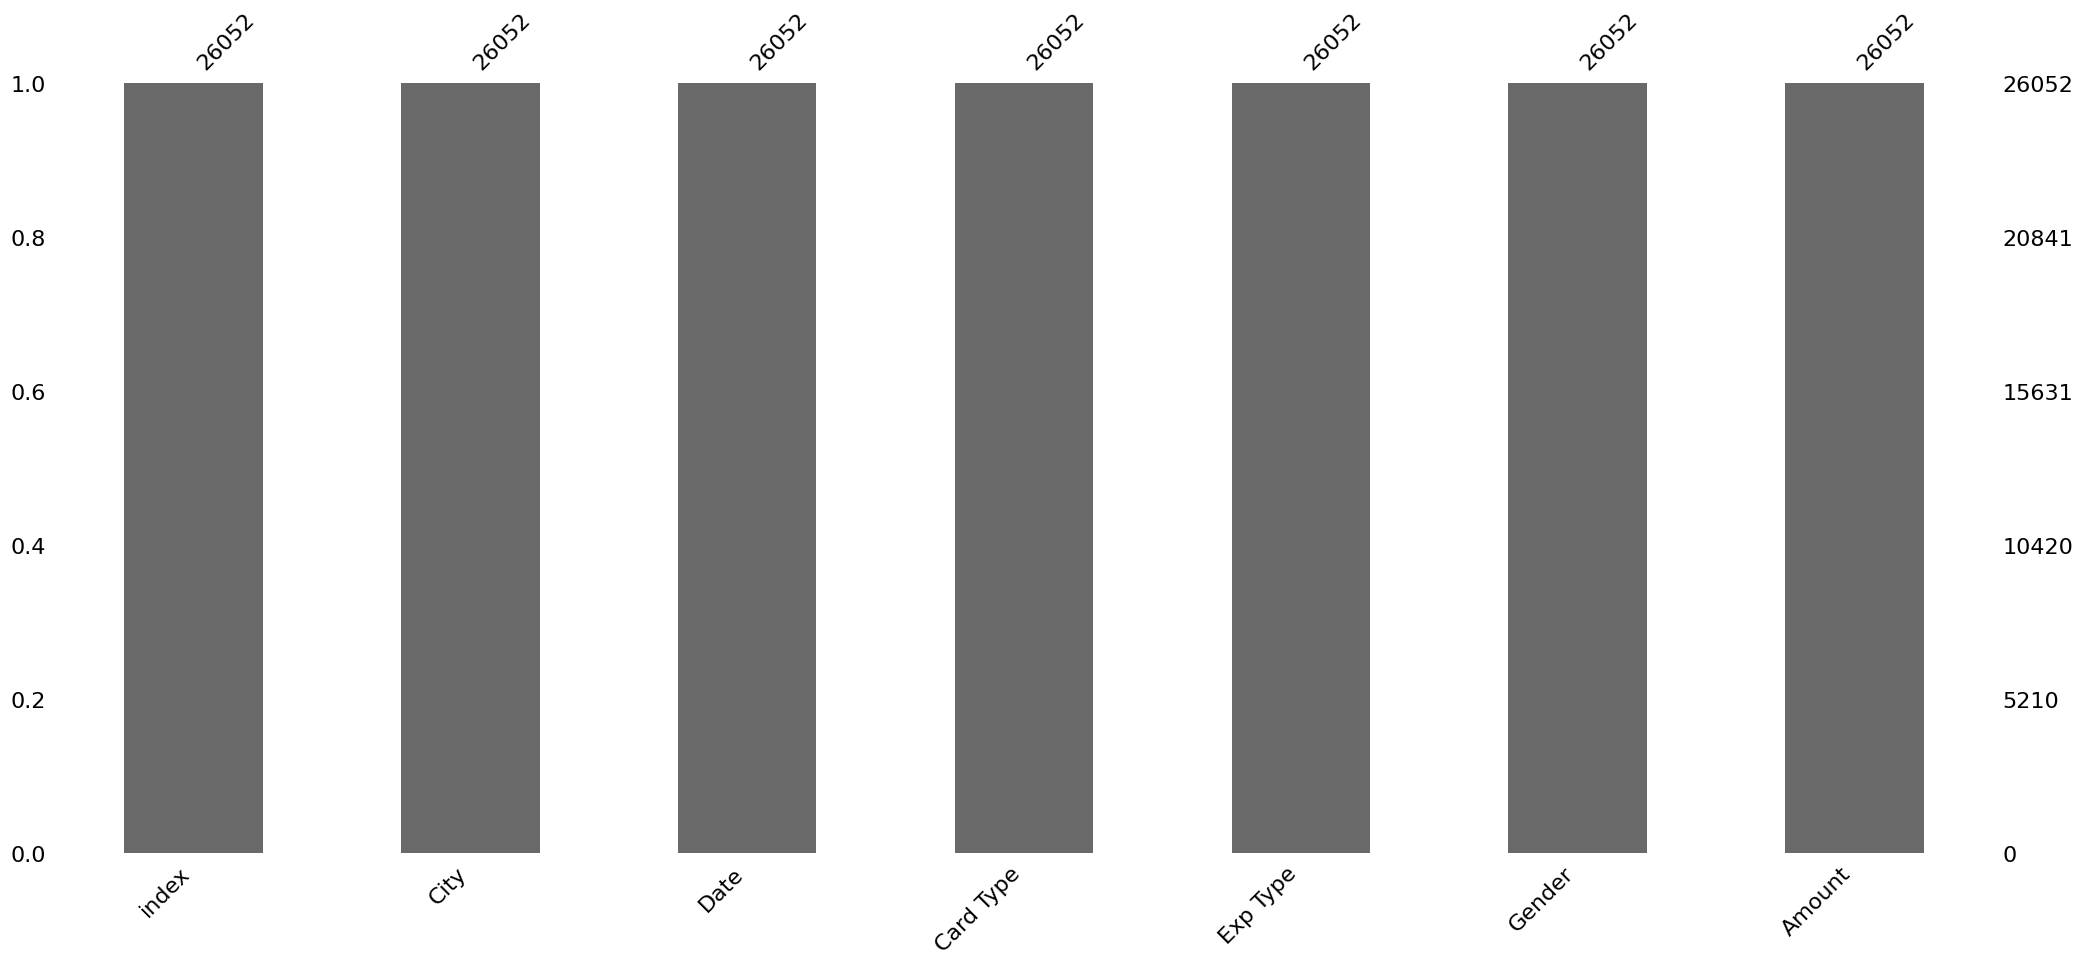

In [ ]:
# check the missing value using missingno
import missingno as msno
msno.bar(df)

              index                           Date         Amount
count  26052.000000                          26052   26052.000000
mean   13025.500000  2014-07-30 11:34:44.385075968  156411.537425
min        0.000000            2013-10-04 00:00:00    1005.000000
25%     6512.750000            2014-03-02 00:00:00   77120.250000
50%    13025.500000            2014-08-02 00:00:00  153106.500000
75%    19538.250000            2014-12-28 00:00:00  228050.000000
max    26051.000000            2015-05-26 00:00:00  998077.000000
std     7520.708943                            NaN  103063.254287


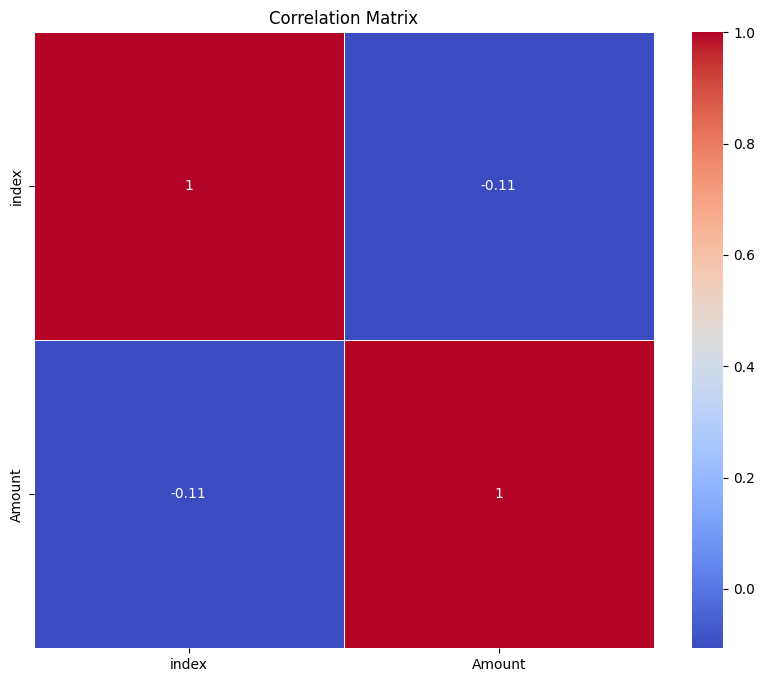

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Summary statistics
print(df.describe())

# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


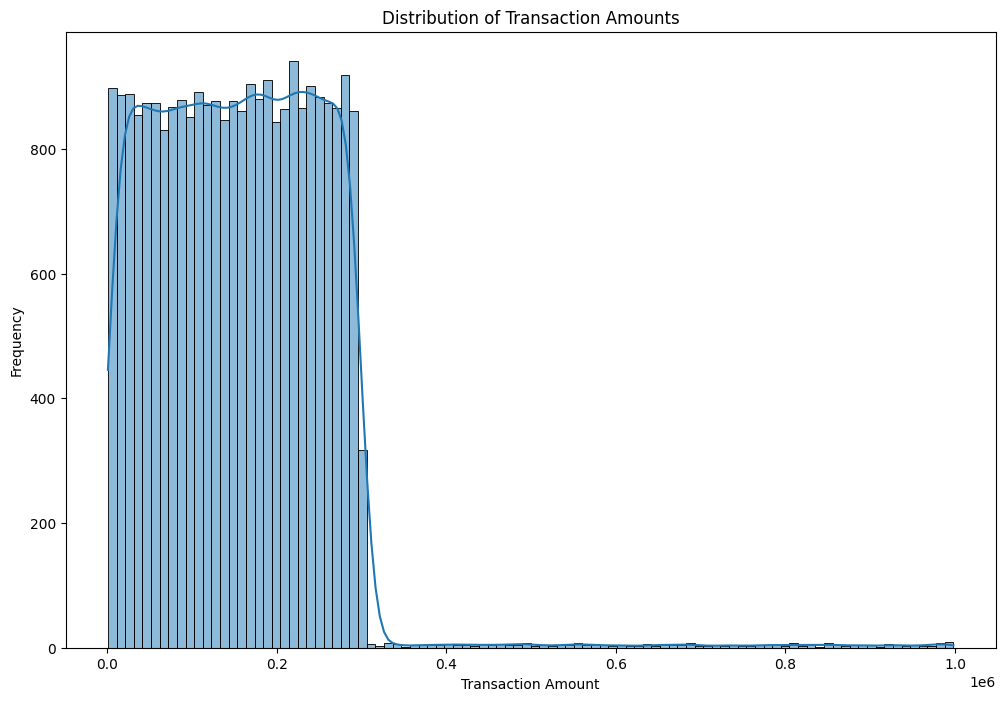

In [ ]:
plt.figure(figsize=(12, 8))
sns.histplot(df['Amount'], kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()


This histogram shows the distribution of transaction amounts. It helps identify the range and frequency of transaction amounts.

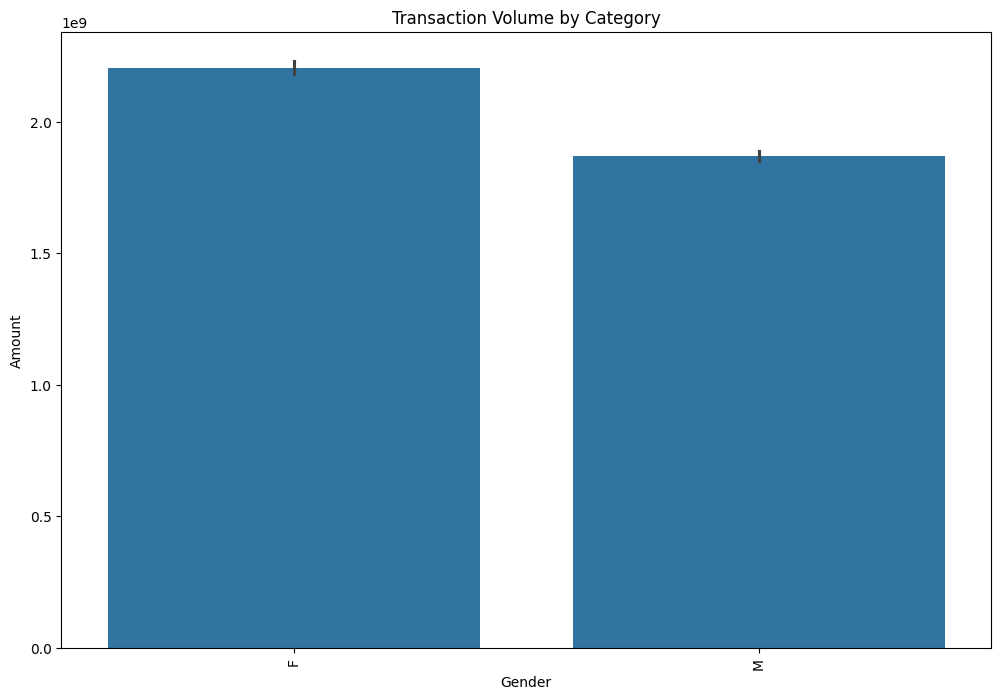

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Gender', y='Amount', data=df, estimator=sum)
plt.title('Transaction Volume by Category')
plt.xlabel('Gender')
plt.ylabel('Amount')
plt.xticks(rotation=90)
plt.show()


This bar plot shows the total transaction volume by category. It highlights which categories have the highest and lowest transaction volumes.

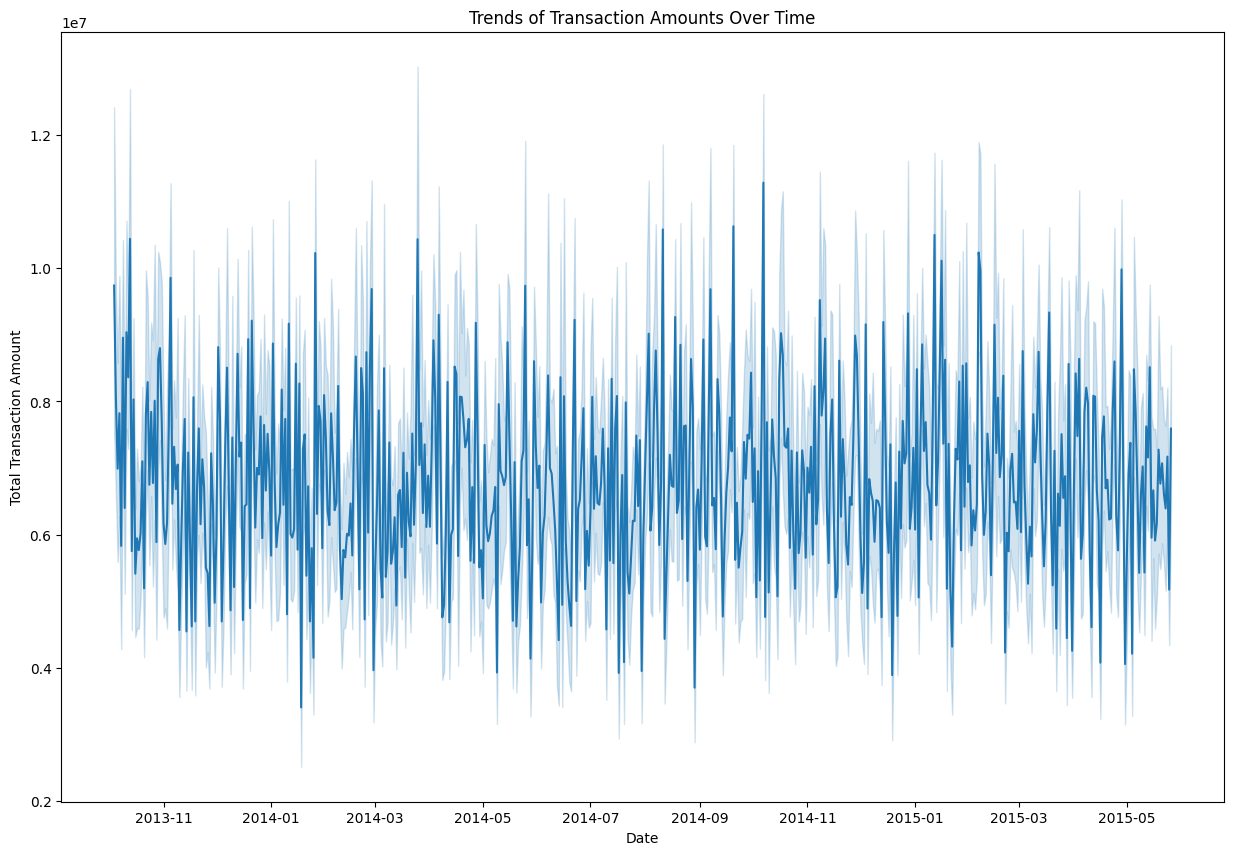

In [ ]:
plt.figure(figsize=(15, 10))
sns.lineplot(data=df, x='Date', y='Amount', estimator=sum)
plt.title('Trends of Transaction Amounts Over Time')
plt.xlabel('Date')
plt.ylabel('Total Transaction Amount')
plt.show()


This line plot shows the trends of transaction amounts over time. It helps identify any patterns or seasonal trends in the data.

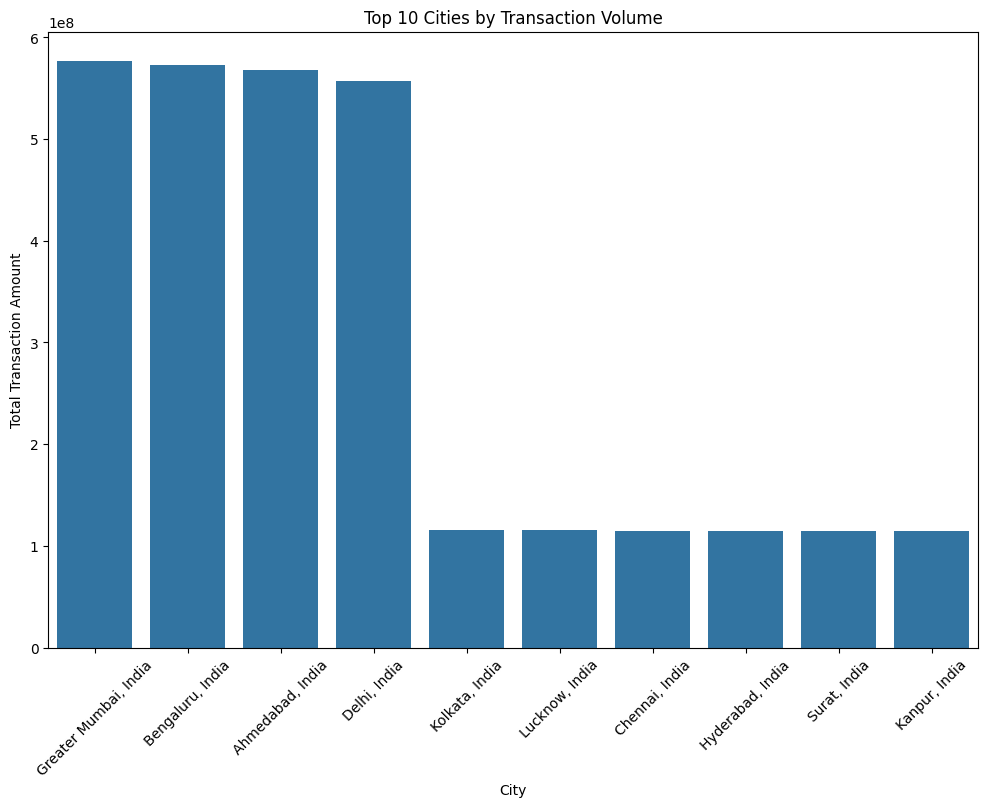

In [ ]:
top_cities = df.groupby('City')['Amount'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x=top_cities.index, y=top_cities.values)
plt.title('Top 10 Cities by Transaction Volume')
plt.xlabel('City')
plt.ylabel('Total Transaction Amount')
plt.xticks(rotation=45)
plt.show()


This bar plot shows the top 10 cities by total transaction volume. It highlights the cities with the highest transaction volumes.

In [30]:
import folium
from folium.plugins import MarkerCluster

# Create a map centered on India
map_center = [20.5937, 78.9629]
m = folium.Map(location=map_center, zoom_start=5)

# Add a marker cluster
marker_cluster = MarkerCluster().add_to(m)

# Coordinates for the top 10 cities
city_coords = {
    'Mumbai': [19.0760, 72.8777],
    'Delhi': [28.7041, 77.1025],
    'Bangalore': [12.9716, 77.5946],
    'Chennai': [13.0827, 80.2707],
    'Kolkata': [22.5726, 88.3639],
    # Add coordinates for more cities as needed
}

# Add markers to the map for the top cities
for city, coords in city_coords.items():
    if city in top_cities.index:
        folium.Marker(
            location=coords,
            popup=f"{city} - Total Transaction Amount: {top_cities[city]}",
            icon=folium.Icon(color='blue', icon='info-sign')
        ).add_to(marker_cluster)

# Save the map to an HTML file
m.save('credit_card_transactions_map.html')

# Display the map in Jupyter Notebook
m


Key Factors Affecting Transaction Volumes
1:Geographical Distribution:

High Concentration in Major Cities: The highest transaction volumes are concentrated in major metropolitan areas such as Mumbai, Delhi, Bangalore, Chennai, and Kolkata. These cities are economic hubs with high consumer spending and a large number of commercial establishments accepting credit card payments.

2:Impact of Economic Events:

Economic events and policy changes, such as demonetization or the introduction of new financial regulations, can have a visible impact on credit card transaction trends. Such events can cause temporary spikes or drops in transaction volumes.

3:Spending Behavior:

Consumers in major cities exhibit a diverse range of spending behaviors, with significant volumes in both essential and non-essential categories. This indicates a balanced use of credit cards for day-to-day needs as well as discretionary spending.

4:Transaction Amount Distribution:

Wide Range of Transaction Amounts: The data shows a wide range of transaction amounts, from small everyday purchases to large transactions, reflecting the versatility of credit card usage among consumers.

